In [72]:
import pandas as pd
from pandas import DataFrame
from pandas import read_csv, pivot_table
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [73]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submission = pd.read_csv('submission.csv')
print(train.shape, test.shape, submission.shape)

(891, 12) (418, 11) (418, 2)


In [74]:
# 데이터 확인
print(train.head(3))
print(test.head(3))
print(submission.head(3))

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
   PassengerId  Pclass                              Name     Sex   Age  SibSp  \
0          892       3                  Kelly, Mr. James    male  34.5      0   
1          893       3  Wilkes, Mrs. James (Ellen Needs)  female  47.0      1   
2          894       2         Myles, Mr. Thomas Francis    male  62.0      0   

   Parch 

In [75]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [76]:
train.describe(include='all') # include='all'은 문자열에 대해서도 통계를 내준다.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [77]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

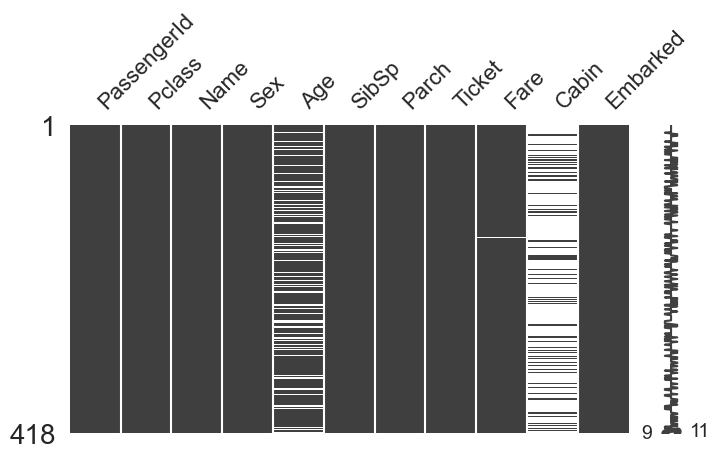

     PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare
0              1         0       3  22.0      1      0   7.2500
1              2         1       1  38.0      1      0  71.2833
2              3         1       3  26.0      0      0   7.9250
3              4         1       1  35.0      1      0  53.1000
4              5         0       3  35.0      0      0   8.0500
..           ...       ...     ...   ...    ...    ...      ...
886          887         0       2  27.0      0      0  13.0000
887          888         1       1  19.0      0      0  30.0000
888          889         0       3   NaN      1      2  23.4500
889          890         1       1  26.0      0      0  30.0000
890          891         0       3  32.0      0      0   7.7500

[891 rows x 7 columns]


In [78]:
import missingno as msno
msno.matrix(test, figsize=(8,4))
plt.show()
train1 = train.drop(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1)
print(train1)

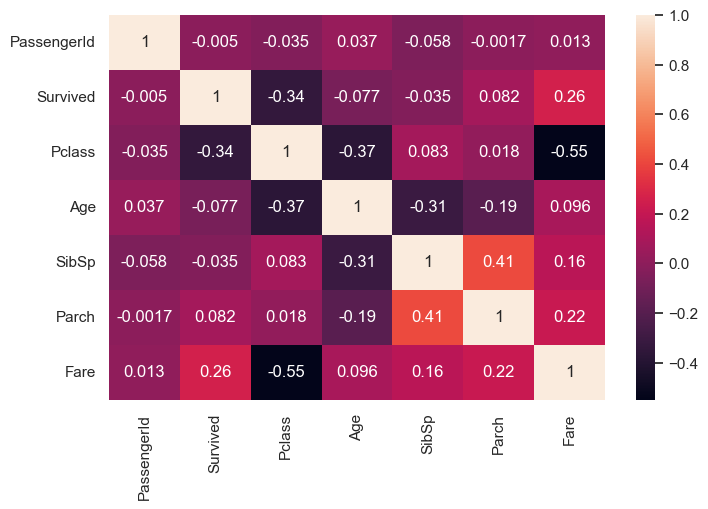

In [79]:
# 숫자형 변수 간의 상관 관계를 계산하여 히트맵 그리기
plt.figure(figsize=(8,5))
sns.set(font_scale=1.0)
sns.heatmap(train1.corr(), annot=True, cbar=True)
plt.show()

In [80]:
# train1.info()
# train1.describe()
# train1 = train1.fillna(29)
# train1
# names = train1.columns
# n = len(names)
# pv = 0.05

# data = []

# for i in range(0, n):
#     fields = names[1] + 'vs' + names[i]
#     s, p = stats.pearsonr(train1[names[1]], train1[names[i]])
#     result = p < pv

#     data.append({'fields': fields, 'statistic':s, 'pvalue': p, 'result': result})

# rdf = DataFrame(data)
# rdf.set_index('fields', inplace=True)
# rdf

In [152]:
# concat 함수로 데이터프레임(train, test)을 위아래 방향(axis=0)으로 연결한다.
# train 데이터와 test 데이터를 구분하기 위해 TrainSplit으로 분류하고
# train과 test를 값으로 지정한다.
# 타이타닉 전체 데이터셋 준비
train['TrainSplit'] = 'Train'
test['TrainSplit'] = 'Test'
data = pd.concat([train, test], axis=0)
# print(data)
# data[data['Pclass'].apply(lambda x : x in [3, 1])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,TrainSplit
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Train
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Train
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Train
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Train
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,Test
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,Test
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Test
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,Test


In [82]:
# 가장 먼저 숫자형 데이터를 가진열을 추가하고 data-num 변수에 저장한다.
# fillna() 메소드를 사용하여 'Age'열의 결측값을 평균값으로 대체한다.
# 'Fare'열의 결측값은 가장 빈도수가 많은 값으로 대체한다(최빈값)

# 숫자형 피처 추출
data_num = data.loc[:, ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived']]

# 결측값 대체
data_num['Age'] = data_num['Age'].fillna(data_num['Age'].mean())
data_num['Fare'] = data_num['Fare'].fillna(data_num['Fare'].mode()[0])

# 학습용 데이터와 예측 대상인 테스트 데이터 구분
selected_feature = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
x_train = data_num.loc[data['TrainSplit']=='Train', selected_feature]
y_train = data_num.loc[data['TrainSplit']=='Train', 'Survived']

x_test = data_num.loc[data['TrainSplit']=='Test', selected_feature]

print("Train 데이터셋 크기 :", x_train.shape, y_train.shape)
print("Test 데이터셋 크기 :", x_test.shape)
# print(data['TrainSplit'].head())
# print(x_test.head())



Train 데이터셋 크기 : (891, 5) (891,)
Test 데이터셋 크기 : (418, 5)


In [83]:
# 학습 데이터(x_train, y_train)를 훈련데이터 80%, 검증데이터 20%로 구분한다.
# 로지스틱 회귀분류 모델에 훈련데이터를 입력하여 학습시킨다.
# 검증 데이터에 대한 예측값(y_val_pred)을 실제값(y_val)값과 비교하여
# 혼동행렬을 계산하고 그래프로 표시한다.

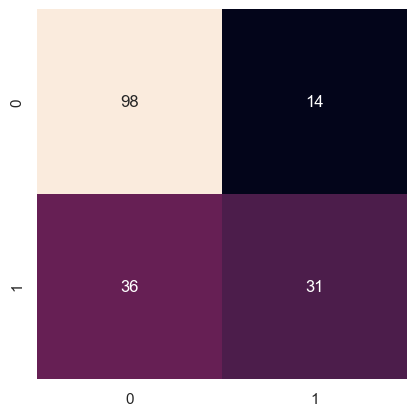

In [84]:
from sklearn.model_selection import train_test_split
x_tr, x_val, y_tr, y_val = train_test_split(x_train, y_train, test_size=0.2, shuffle=True, random_state=20)

# 로지스틱 회귀 모델
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(x_tr, y_tr)
y_val_pred = lr_model.predict(x_val)

# conFusion Matrix
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_val, y_val_pred), annot=True,  cbar=False, square=True)
# cbar를 통해 colorbar의 유무를 정해 줄 수 있고
# linewidths 각 cell마다 선을 넣어주고 굵기를 정할 수 있다.
# annot 각 cell의 값을 표기할 수 있다. 이때 fmt를 이용해 각 cell 값의 데이터 형태를 지정해주는 과정이 필요할 수 있다.
# vmin, vmax로 색으로 최대값, 최소값을 표현할 수 있다. ex) vmin = 200, vmax=500
plt.show()

모형의 예측값과 실제값을 각각 축으로 하는 2x2 매트릭스 표현을 한 것을 혼동행렬이라고 부르고
이를 근거로 정밀도, 재현율, f1(f1-score)를 산출할 수 있다.
정밀도 True로 예측한 분석 대상중에서 실제 값이 True인 비율을 말한다. 
정밀도가 높다는 것은 False Positive(실제 False를 True로 잘못 예측하는 오류가적다는 것을 의미한다.)
재현율은 실제 True 중에서 True로 에측하여 모형이 적중한 비율을 말한다.
재현율이 높다는 것은 False Negative(실제 Ture를 False)로 잘못 예측하는 오류가 낮다는 뜻이다.
F1지표는 정확도와 재현율의 조화 평균을 계산한 값으로, 모형의 예측력을 종합적으로 평가하는 지표다.
지표값이 높을 수록 분류 모형의 예측력이 좋다고 말할 수 있다.

In [85]:
# 평가지표
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score
print("Accuracy:%.4f" % accuracy_score(y_val, y_val_pred))
print("Precision:%.4f" % precision_score(y_val, y_val_pred))
print("recall:%.4f" % recall_score(y_val, y_val_pred))
print("F1:%.4f" % f1_score(y_val, y_val_pred))
print("roc_auc:%.4f" % roc_auc_score(y_val, y_val_pred))

Accuracy:0.7207
Precision:0.6889
recall:0.4627
F1:0.5536
roc_auc:0.6688


In [86]:
y_test_pred = lr_model.predict(x_test)
# y_test_pred
submission['Survived'] = y_test_pred.astype(int)

In [87]:
# 타킷 레이블의 분포 확인
train['Survived'].value_counts(dropna=False)

Survived
0    549
1    342
Name: count, dtype: int64

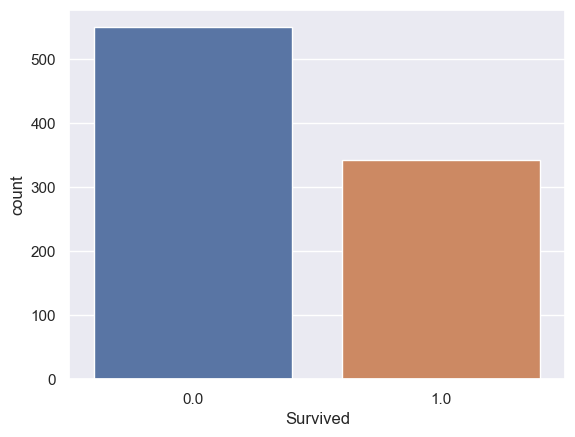

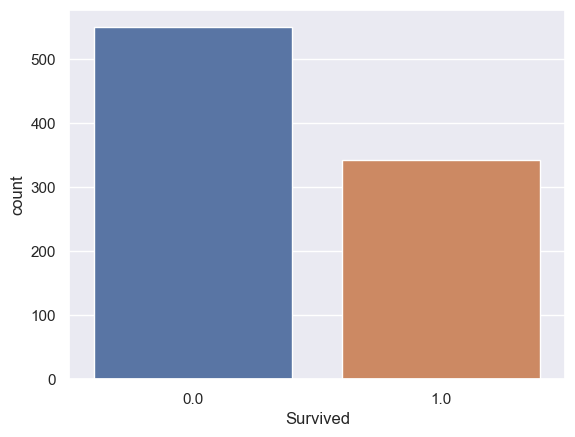

In [88]:
# 시본 countplot으로 생존자(class 1)와 사망자(class 0)의 분포를 확인한다.
# TrainSplit 열을 이용하여 train 데이터만 따로 추출하여 적용한다.

# 객실 등급별 분포 확인
sns.countplot(x='Survived', data=data)
plt.show()
sns.countplot(x='Survived', data=data[data['TrainSplit']=='Train'])
plt.show()

객실 등급을 나타내는 pcalss 열의 데이터 분포를 확인한다. 3등석 승객이 가장 많고, 1등석과 2등석은 비슷한 숫자로 파악된다.
hue옵션을 이용하여 Train 데이터와 test데이터를 구분해보면 분포가 비교적 고르게 나누어진 것을 볼 수 있다.

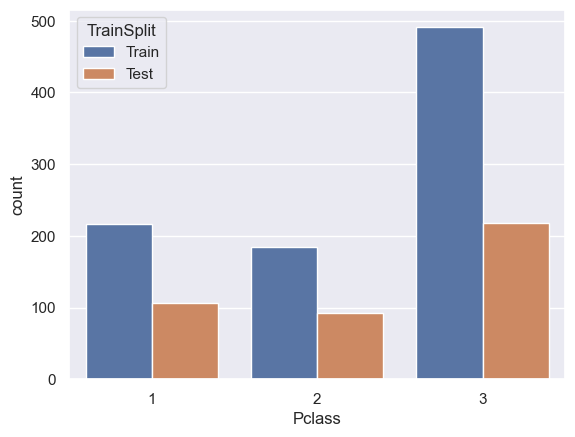

In [89]:
# train - test 데이터 분포
sns.countplot(x='Pclass', hue='TrainSplit', data=data)
plt.show()

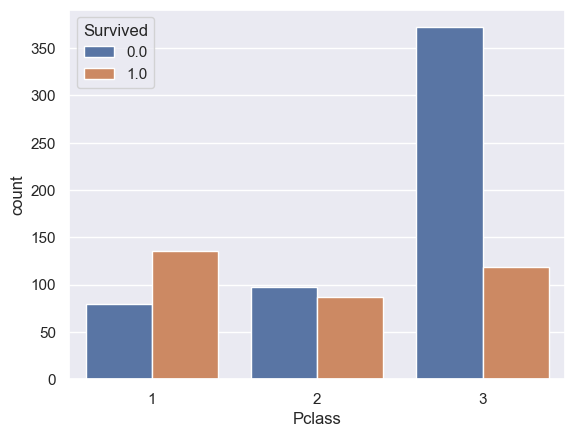

In [90]:
# Train 데이터 중에서 객실 등급에 따른 생존자 비율을 살펴본다.
sns.countplot(x='Pclass', hue='Survived', data=data)
plt.show()

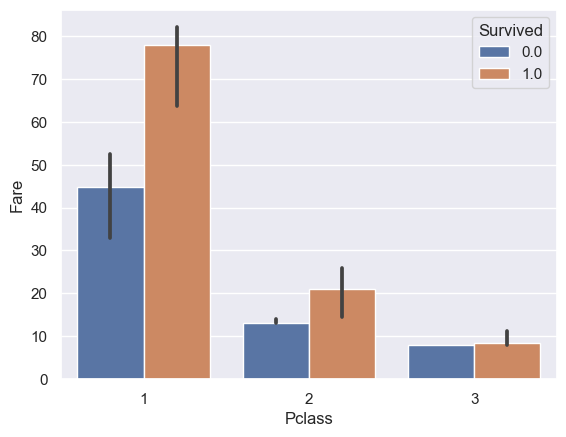

In [91]:
# 이번에는 barplot 함수를 사용해 등급별 객실 요금의 중간값 분포를살펴본다
# Pclass 별 Fare 객실 요금 중간값 비교
sns.barplot(x='Pclass', y='Fare', hue='Survived', data=data, estimator=np.median)
# estimator 표집값들로부터 모수의 값을 추정하는 방법
plt.show()

In [92]:
# 남여 성별에 따른 생존율 분포를 파악해본다.
# 동시에 시본 histplot 함수의 multiple 옵션을 조정한다.
# multiple 속성에 dodge를 설정하면 hue옵션의 데이터를 기준으로
# 막대그래프를 서로 겹치지 않게 수평으로 펼쳐서 분리 표시한다.

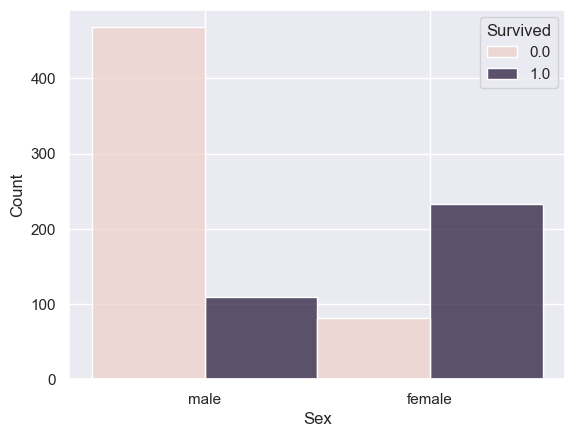

In [93]:
# histplot 함수 - dodge옵션
sns.histplot(x='Sex', hue='Survived', multiple='dodge', data=data)
plt.show()

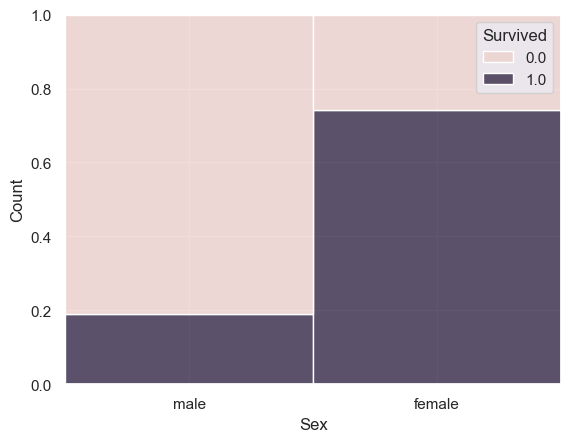

In [94]:
# multiple 속성에 fill 옵션을 설정하면 hue 속성의 상대적 비율을 알 수 있다.
# histplot 함수 - fill 옵션
sns.histplot(x='Sex', hue='Survived', data=data, multiple='fill')
plt.show()

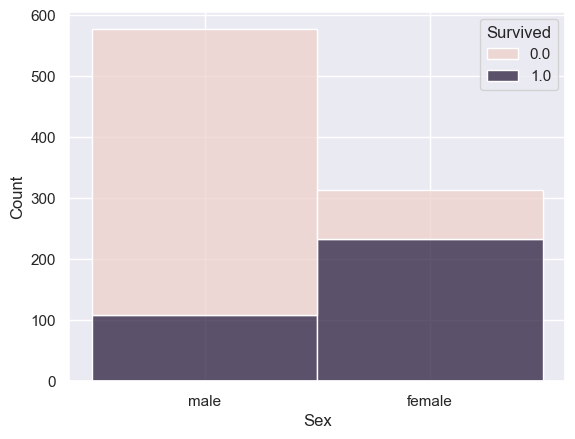

In [95]:
# histplot 함수 - stack 옵션
# 그래프를 상하 방향으로 누적하여 나타낸다.
sns.histplot(x='Sex', hue='Survived', multiple='stack', data=data)
plt.show()

In [96]:
# 레이블 인코딩 
data.loc[data['Sex'] == 'female', 'Sex'] = 0
data.loc[data['Sex'] == 'male', 'Sex'] = 1
data['Sex'] = data['Sex'].astype(int)

# 성별 분포 확인
data['Sex'].value_counts(dropna=False)

Sex
1    843
0    466
Name: count, dtype: int64

In [97]:
# 문자열 데이터를 다루는 방법
# 승객 이름이 들어 있는 Name 열은 문자열 데이터로만 구성이 되어 있지 않다.
# unique 값으로 고유값을 확인한다.

In [98]:
data['Name'].unique

<bound method Series.unique of 0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
413                                   Spector, Mr. Woolf
414                         Oliva y Ocana, Dona. Fermina
415                         Saether, Mr. Simon Sivertsen
416                                  Ware, Mr. Frederick
417                             Peter, Master. Michael J
Name: Name, Length: 1309, dtype: object>

name 열을 선택하고 str 속성을 적용하면 문자열을 직접 추출할 수 있다.
split 메소드를 적용하면 이름을 나타내는 문자열을 쉼표(,)를 기준으로 분할한다.
쉼표를 기준으로 2개의 문자열로 나눠지는데, 타이틀(Mr, Ms 등)이 들어있는 뒷부분의 문자열을 따로 추출한다.

In [99]:
title_name = data['Name'].str.split(",", expand=True)[1]
# 하나의 컬럼을 여러개로 나누기(expand=True)[1] 0은 ,앞에 내용
# 1은 ,뒤에 내용 추출
title_name

0                                  Mr. Owen Harris
1       Mrs. John Bradley (Florence Briggs Thayer)
2                                      Miss. Laina
3               Mrs. Jacques Heath (Lily May Peel)
4                                Mr. William Henry
                          ...                     
413                                      Mr. Woolf
414                                  Dona. Fermina
415                            Mr. Simon Sivertsen
416                                  Mr. Frederick
417                              Master. Michael J
Name: 1, Length: 1309, dtype: object

In [100]:
# 문자열에 split 메소드를 적용하고 마침표를 기준으로 분할하면 타이틀 부분과 성을 나타내는
# family Name 부분([1])을 나눌 수 있다. 앞부분만 선택하면 타이틀을 추출할 수 있다.
title = title_name.str.split(".", expand=True)[0]
title.value_counts(dropna=False)

0
 Mr              757
 Miss            260
 Mrs             197
 Master           61
 Rev               8
 Dr                8
 Col               4
 Mlle              2
 Major             2
 Ms                2
 Lady              1
 Sir               1
 Mme               1
 Don               1
 Capt              1
 the Countess      1
 Jonkheer          1
 Dona              1
Name: count, dtype: int64

- 비슷한 속성을 가진 타이틀을 같은 그룹으로 묶는다.
- replace 함수를 타이틀이 들어 있는 시리즈 객체에 적용하면
- 리스트안의 문자열을 뒤에 나오는 문자열로 모두 바꾼다.
- 따라서 다음과 같이 7개의 그룹으로 정리 할 수 있고, 타이틀 속성을 나타내는 Title 열을 추가해 준다.

In [101]:
title = title.replace(['Ms'], 'Miss', regex=True)
title = title.replace(['Mlle', 'the Countess', 'Lady', 'Don', 'Dona', 'Mme', 'Sir', 'Jonkheer', 'Noblea'], 'Noble', regex=True)
title = title.replace(['Col', 'Major', 'Capt'], 'Officer', regex=True)
title = title.replace(['Dr', 'Rev'], 'Priest', regex=True)
data['Title'] = np.array(title)
data['Title'].value_counts(dropna=False)

Title
 Mr         757
 Miss       262
 Mrs        197
 Master      61
 Priest      16
 Noble        8
 Officer      7
 Noblea       1
Name: count, dtype: int64

In [102]:
# 앞에서 정리한 Title 열의 분포를 그린다. 각타이틀 별 생존여부에 따른 승객 나이의 분포를 시본 violinplot함수에 그린다.
# Noble 타이틀을 가진 승객 중에서는 생존자가 없고, 
# Officer 타이틀을 가진 승객중에서 특정 나이대에 속하는 승객만 생존자가 있다는것을 알 수 있다.

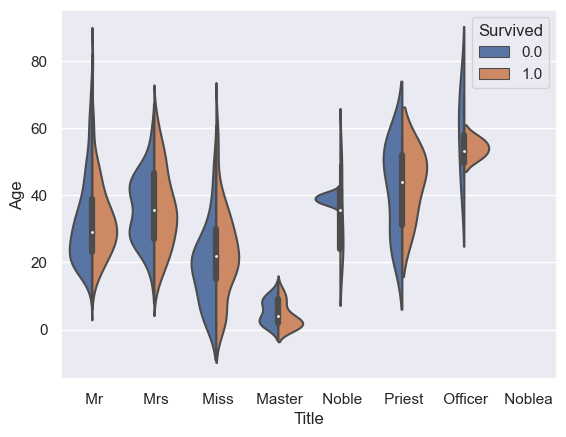

In [103]:
sns.violinplot(x='Title', y='Age', hue='Survived', data=data, split=True)
plt.show()

In [104]:
# Title 열에 의미 있는 정보를 추출하여 저장했기 때문에 불필요해진 Name 열을 데이터 프레임에서 삭제한다. 
# drop 메소드를 사용하고 축 방향을 axis=1로 지정한다.

In [105]:
# Name 열 삭제
data = data.drop('Name', axis=1)
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'TrainSplit', 'Title'],
      dtype='object')

In [106]:
# 승객 나이가 들어 있는 Age 열의 결측값을 확인한다.
# 같은 타이틀을 갖는 승객끼리 그룹을 나누고,
# 그룹별 승객 나이의 중간값으로 결측값을 대체한다.

In [107]:
# 결측값 확인 및 대체
for title in data['Title'].unique():
    # 결측값 개수 확인
    print("%s 결측값 개수:" % title, data.loc[data['Title']==title, 'Age'].isnull().sum())
    # 각 Title의 중간값으로 대체
    age_med = data.loc[data['Title'] == title, 'Age'].median()
    data.loc[data['Title']==title, 'Age'] = data.loc[data['Title']==title, 'Age'].fillna(age_med)
    # 결측값 처리 여부 확인
print('\n')
print("Age 열의 평균값 개수 : ", data['Age'].isnull().sum()) 

 Mr 결측값 개수: 176
 Mrs 결측값 개수: 27
 Miss 결측값 개수: 51
 Master 결측값 개수: 8
 Noble 결측값 개수: 0
 Priest 결측값 개수: 1
 Officer 결측값 개수: 0
 Noblea 결측값 개수: 0


Age 열의 평균값 개수 :  0


In [108]:
# seaborn의 Kind 옵션을 hist로 지정하여 히스토 그램을 그린다.
# hue 속성에 따라 생존자를 구분하여 출력한다.
# 5세 미만의 승객의 생존율이 높고 30세 전후의 승객의 생존율이 낮은 경향을 보인다.

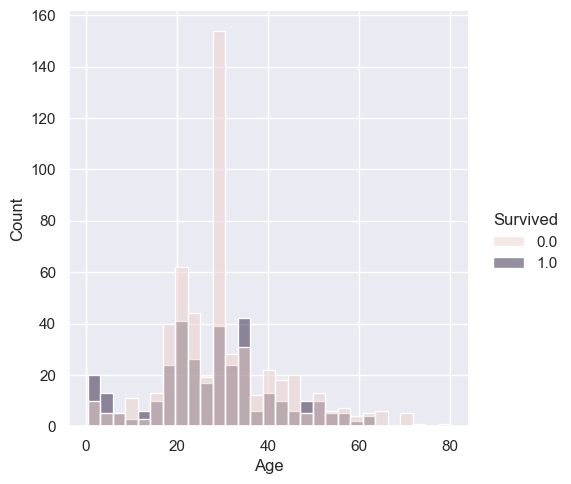

In [109]:
# Age의 분포
sns.displot(x='Age', kind='hist', hue='Survived',
            data=data)
plt.show()

- 나이에 따른 생존율 차이가 나기 때문에 앞의 히스토 그램 분포를 기준으로 Age 데이터를 여러 개 구간으로 나눈다.(비닝기법)
- 판다스의 cut함수를 사용하고 각 구간을 나누는 값을 경계값(bins), 각 구간의 이름(lables)을 지정한다.
- ex) 0~4세는 infant, 4~8세는 child 등으로 구분하여 정리한다.
- AgeBin 열을 만들어 추가한다.

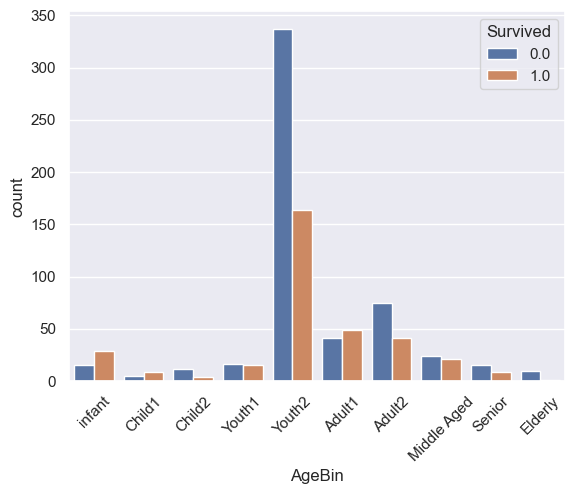

In [110]:
# Binning - 구간 나누기
bins = [0,4,8,12,16,32,36,48,56,64,100]
labels = ['infant', 'Child1', 'Child2', 'Youth1', 'Youth2', 'Adult1', 'Adult2', 'Middle Aged', 'Senior', 'Elderly']
data['AgeBin'] = pd.cut(data['Age'], bins=bins, labels=labels)

# Age_bin(나이 구간)에 따른 생존율 비교
sns.countplot(x='AgeBin', hue='Survived', data=data)
plt.xticks(rotation=45)
plt.show()

- 동승한 형제자매/배우자 수를 나타낸다. 상자 그림을 그리는 boxplot 함수로 생존여부를 표시하면 
- 동승자가 2~3명일 경우 나이에 따른 생존 여부 차이가 있음을 알 수 있다.

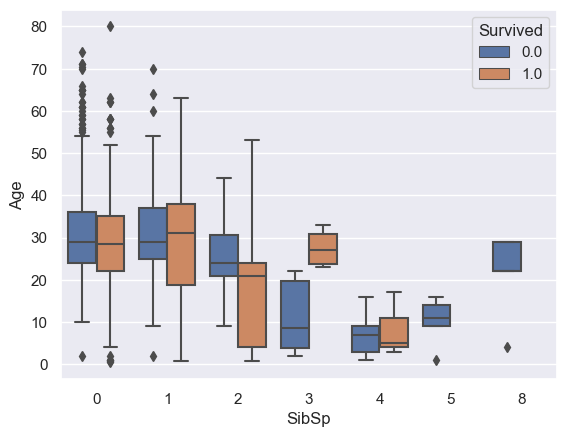

In [111]:
# 형제 자매/ 배우자 수와 승객 나이 및 생존율 관계
sns.boxplot(x='SibSp', y='Age', hue='Survived', data=data)
plt.show()

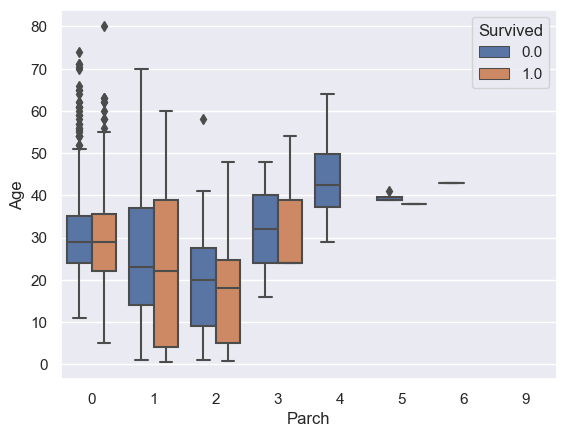

In [112]:
# 부모/자식 수에 따른 승객 나이 및 생존율 관계
sns.boxplot(x='Parch', y='Age', hue='Survived', data=data)
plt.show()

- SibSp 열과 Parch 열의 데이터를 더하면 함께 탑승한 모든 가족의 수를 계산할 수 있다.
- 이를 토대로 가족 수와 객실 등급을 기준으로 생존율의 차이를 확인한다. 
- 가족 수에 따라 객실 등급에 따른 생존율에 차이가 있음을 알 수 있다.

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\nanfunctions.py:1556: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,


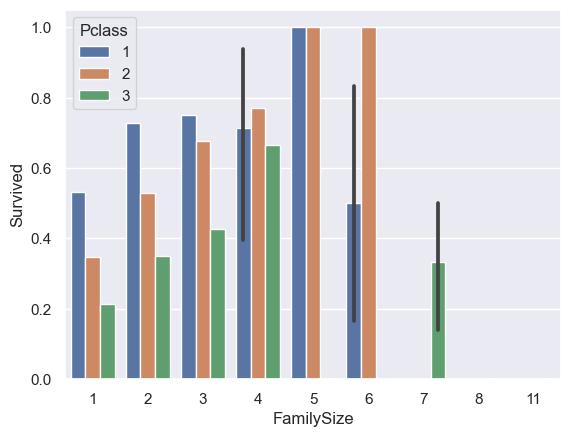

In [113]:
# 가족 구성원의 수
data['FamilySize'] = data['SibSp'] + data['Parch'] + 1
# 가족 구성원의 수와 생존과의 관계
sns.barplot(x='FamilySize', y='Survived', hue='Pclass', estimator=np.mean, data=data)
plt.show()

In [114]:
# 탑승 요금을 나타내는 Fare 열에는 1개의 결측 데이터가 존재
# 결측값 확인
data.loc[data['Fare'].isnull(), :]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,TrainSplit,Title,AgeBin,FamilySize
152,1044,NaN,3,1,60.5,0,0,3701,NaN,NaN,S,Test,Mr,Senior,1


In [115]:
# 3등석 요금의 평균값을 가지고 결측값 대체
p3_fare_mean = data.loc[data['Pclass']==3, 'Fare'].mean()
data['Fare'] = data['Fare'].fillna(p3_fare_mean)
data.loc[data['PassengerId']==1044, :'Fare']

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare
152,1044,NaN,3,1,60.5,0,0,3701,13.302889


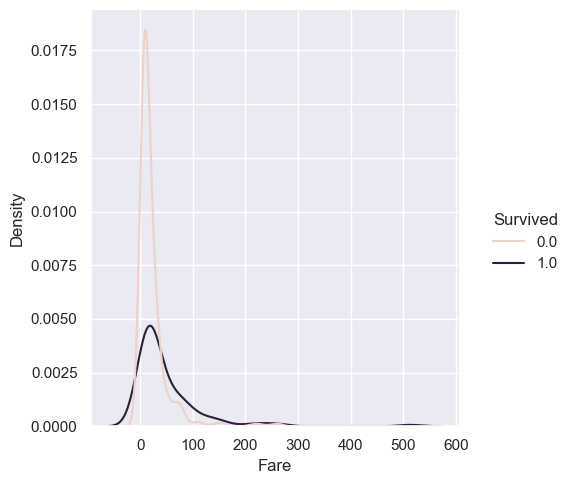

In [116]:
# fare 분포
sns.displot(x='Fare', kind='kde', hue='Survived', data=data)
plt.show()

- 비대칭 분포를 정규화하기 위해 로그변환을 한다. 넘파이 log1p함수를 이용하여
- Fare 열의 데이터 로그를 취하면, 다음과 같이 정규분포에 가까운 형태로 변환된다.
- 단, 요금이 낮은 쪽으로 데이터가 비어있는 구간이 있다는 사실도 알 수 있다.

0      2.110213
1      4.280593
2      2.188856
3      3.990834
4      2.202765
         ...   
413    2.202765
414    4.699571
415    2.110213
416    2.202765
417    3.150952
Name: FareLog, Length: 1309, dtype: float64


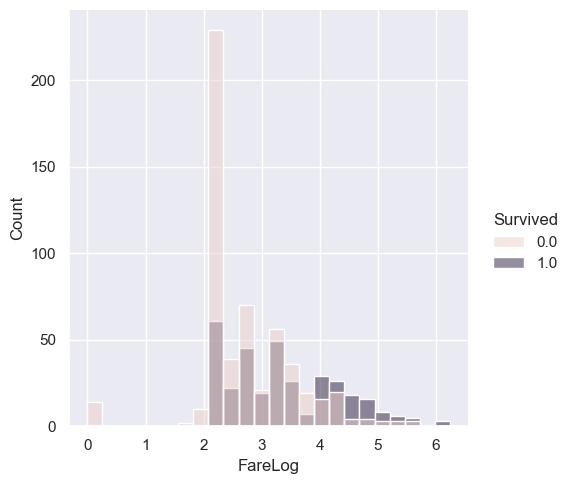

In [117]:
# log변환
data['FareLog'] = np.log1p(data['Fare'])
# FareLog 분포
print(data['FareLog'])
sns.displot(x='FareLog', kind='hist', hue='Survived', data=data)
plt.show()

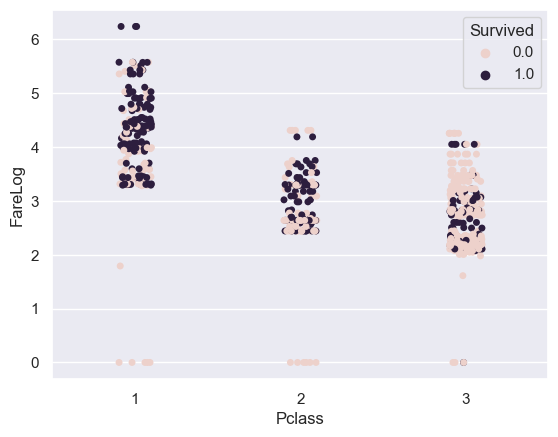

In [118]:
# stripplot 함수로 객실 등급에 따른 요금 분포를 살펴보면
# hue 속성으로 생존자 분포를 비교한다.
# 객실 등급 별 객실 요금 분포와 생존율
sns.stripplot(x='Pclass', y='FareLog', hue='Survived', data=data)
plt.show()

In [119]:
# 결측값 확인
data.loc[data['Embarked'].isnull(), :]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,TrainSplit,Title,AgeBin,FamilySize,FareLog
61,62,1.0,1,0,38.0,0,0,113572,80.0,B28,NaN,Train,Miss,Adult2,1,4.394449
829,830,1.0,1,0,62.0,0,0,113572,80.0,B28,NaN,Train,Mrs,Senior,1,4.394449


- 탑승장소를 확인할 수 있는 방법이 뚜렷하지 않기 때문에 가장 탑승자가 많은 항구인 'S'값으로 결측값을 채운다.
- 이때 가장 많이 출현한 데이터인 최빈값은 mode함수로 구한다.

In [120]:
# 최빈값을 사용하여 결측값 처리
print("Embarked 열의 최빈값", data['Embarked'].mode())
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])
data['Embarked'].value_counts(dropna=False)

Embarked 열의 최빈값 0    S
Name: Embarked, dtype: object


Embarked
S    916
C    270
Q    123
Name: count, dtype: int64

- 시본 catplot 함수의 kind 옵션을 point로 하면 각 클래스별 데이터 중심과 분산을 비교할 수 있다.
- C항구의 생존율이 높은 편이다.

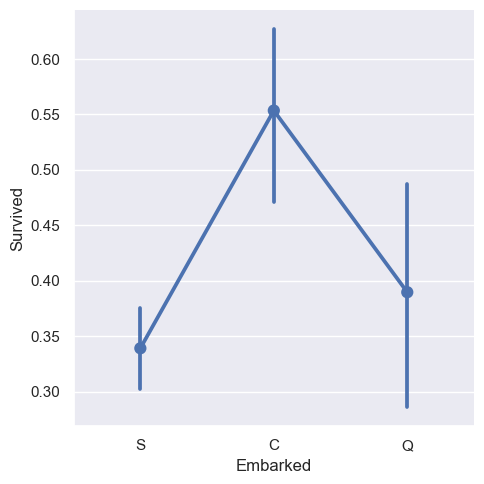

In [121]:
# 탑승 항구별 생존율 비교
sns.catplot(x='Embarked', y='Survived', kind='point', data=data)
plt.show()

In [122]:
# Cabin 열은 객실 구역을 나타내는 알파벳과 숫자로
# 고유값 확인
data['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

str 속성으로 문자열을 추출하고, slice 함수로 문자열의 첫글자만을 선택한다.

결측값이 1014로 많은 편이고, 이런경우 보통 모델학습에서 삭제한 후 진행한다.

일단 먼저 유의미한 정보인지 확인한다.

In [123]:
# 첫 번째 알파벳 이니셜 추출
data['Cabin'].str.slice(0,1).value_counts(dropna=False)

Cabin
NaN    1014
C        94
B        65
D        46
E        41
A        22
F        21
G         5
T         1
Name: count, dtype: int64

###### 결측값을 'u'로 대채한다. 생존율 그래프로 그리면 구역별로 차이가 있다.
###### 특히 객실 구역 데이터가 없어서 결측값으로 분류된 'u'의 경우 생존율이 가장 낮게나타난다.

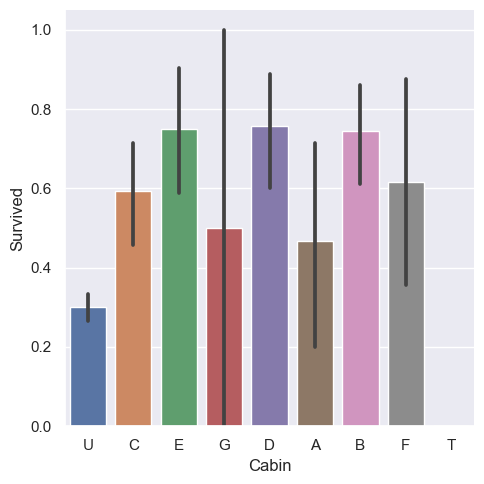

In [124]:
# 알파벳 이니셜로 대체, 결측값은 'u'로 입력
data['Cabin'] = data['Cabin'].str.slice(0,1)
data['Cabin'] = data['Cabin'].fillna("U")

# Cabin 구역별 생존율 비교
sns.catplot(x='Cabin', y='Survived', kind='bar', data=data)
plt.show()

In [125]:
# 탑승권 번호를 나타내는 Ticket 열의 데이터는 알파벳과 숫자가 결합된 형태
# 고유값 확인
data['Ticket'].value_counts(dropna=False)

Ticket
CA. 2343        11
CA 2144          8
1601             8
PC 17608         7
S.O.C. 14879     7
                ..
113792           1
36209            1
323592           1
315089           1
359309           1
Name: count, Length: 929, dtype: int64

In [126]:
# 알파벳 부분만 따로 추출하여 정리한다.
# 문자열 정리 - 알파벳 추출
data['Ticket'] = data['Ticket'].str.replace(",", "").str.replace("/", "")
data['Ticket'] = data['Ticket'].str.strip().str.split(' ').str[0]
data['Ticket'].value_counts(dropna=False)

Ticket
PC           92
C.A.         46
SOTONO.Q.    16
W.C.         14
STONO        14
             ..
3460          1
350060        1
239854        1
4134          1
359309        1
Name: count, Length: 753, dtype: int64

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


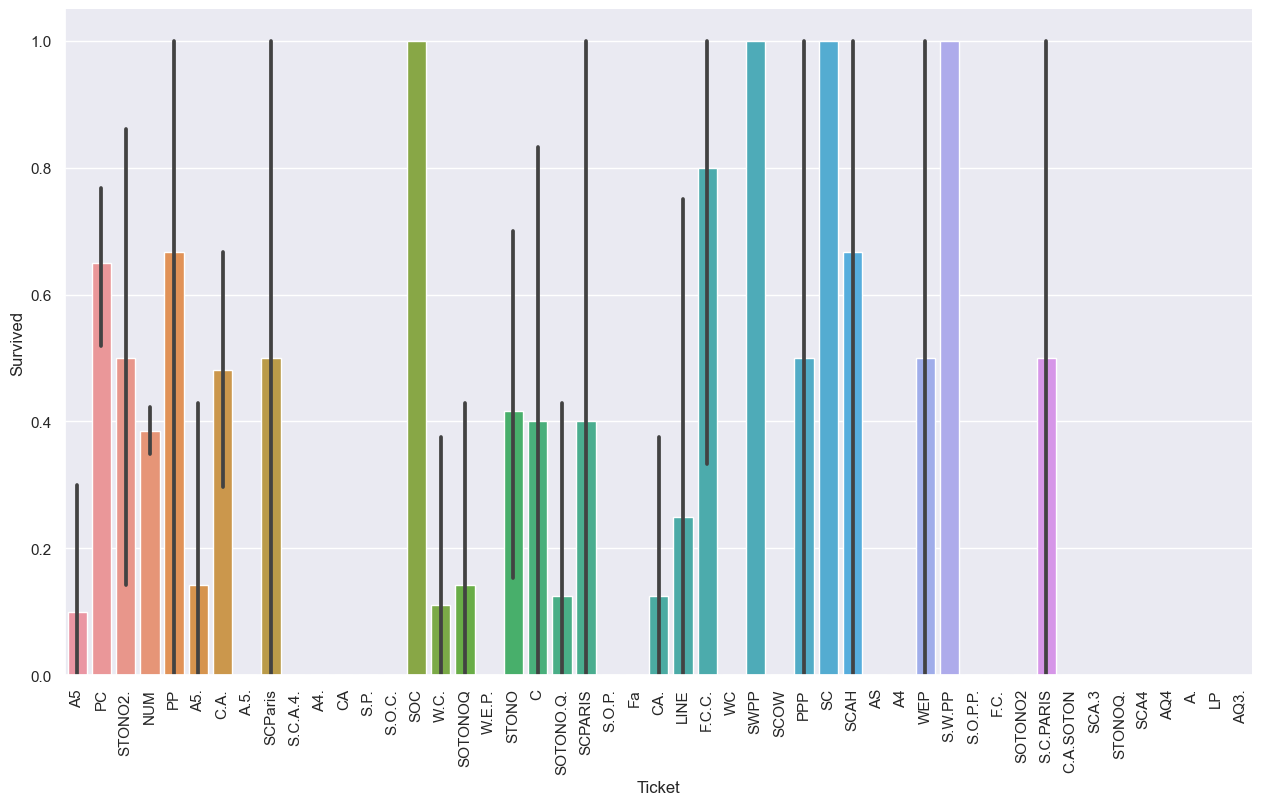

In [127]:
# 문자열이 숫자인 경우 "NUM"으로 대체]
data.loc[data['Ticket'].str.isdigit(), "Ticket"] = "NUM"
data['Ticket'].value_counts(dropna=False)[:10]

# Ticket 번호별 생존율 비교
fig = sns.catplot(x='Ticket', y='Survived', kind='bar', data=data)
fig.fig.set_size_inches(15,8)
plt.xticks(rotation=90)
plt.show()

문자열 데이터로 이루어진 Title 열과 AgeBin열의 범주형(문자열) 데이터를 숫자 레이블로 바꾼다.

사이킷런 LabelEncoder 객체를 만들고, fit_transfrom 함수를 사용하여 각 열의 데이터에 적용한다.

각 열에 속하는 범주의 개수만큼 숫자 레이블로 변환된다.

###### 예를 들어 3개의 범주가 있으면 0,1,2와 같이 3개의 숫자를 사용하여 데이터를 바꿔준다.

In [128]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder
for col in ['Title', 'AgeBin']:
    encoder = LabelEncoder()
    data[col] = encoder.fit_transform(data[col])

data.loc[:, ['Title', 'AgeBin']]

,Title,AgeBin
0,2,8
1,3,1
2,1,8
3,3,0
4,2,0
...,...,...
413,2,8
414,5,1
415,2,1
416,2,8


- 문자열 데이터를 숫자형 데이터로 변환하는 다른 방법인 원 핫 인코딩 방법을 사용한다.
- 하나의 열을 범주 개수만큼 분할하여 범주에 해당하는 열에는 1을 입력하고 나머지 열에는 0을 입력한다.
- 판다스 get_dummics 함수를 사용한다. colummns 속성에 원핫 인코딩할 열이름을 입력한다.
- prefix 옵션은 분할하여 생성되는 열 이름의 앞부분을 지정한다.
- 새로 만들어지는 열 이름은[prefix + '_' + 범주형 데이터]형태가 된다.
- Emb_Q 열은 Embarked의 앞 3글자를 따오고 데이터가 'Q'인경우를 말한다.
- drop_first 옵션을 True로 지정하면 첫번째 열을 삭제하는데, 
- 하나의 열이 없어도 원래 범주를 구분하는데 충분하기 때문에 삭제한다.

In [129]:
# 범주형 변수로 변환 및 원 핫 인코딩
onehot_prefix = []
for col in ['Embarked', 'Cabin', 'Ticket']:
    data[col] = data[col].astype('category')
    data = pd.get_dummies(data, columns=[col], prefix=col[:3], drop_first=True)
    onehot_prefix.append(col[:3])
data.loc[:, [col for col in data.columns if col[:3] in onehot_prefix]]    

,Emb_Q,Emb_S,Cab_B,Cab_C,Cab_D,Cab_E,Cab_F,Cab_G,Cab_T,Cab_U,...,Tic_SOTONO2,Tic_SOTONOQ,Tic_STONO,Tic_STONO2.,Tic_STONOQ.,Tic_SWPP,Tic_W.C.,Tic_W.E.P.,Tic_WC,Tic_WEP
0,False,True,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,True,...,False,False,False,True,False,False,False,False,False,False
3,False,True,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,False,True,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
414,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
415,False,True,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
416,False,True,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


In [130]:
# 사이킷런 MinMaxScaler를 사용하여 모델 학습에 사용할 피처의 스케링일을 한다
# 학습에 사용할 피처가 아닌 TrainSplit열을 제외한다.

# 피처 스케일링
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# 스케일링 처리할 피처 선택 - TrainSplit 등 일부 열 제외
scaled_cols = [col for col in data.loc[:, 'Pclass':].columns if col!='TrainSplit']
# print(data)
# data = data.drop('Sex', axis='columns')

data_scaled = data.loc[:, scaled_cols]
data_scaled = scaler.fit_transform(data_scaled)

# 스케일링 변환된 값을 데이터프레임에 반영
data.loc[:, scaled_cols] = data_scaled[:,:]
data.head()
# Pclass,Sex,Age,SibSp,Parch,Fare,TrainSplit,Title,AgeBin,FamilySize,FareLog,Emb_Q,Emb_S,Cab_B,
# Cab_C,Cab_D,Cab_E,Cab_F,Cab_G,Cab_T,Cab_U,Tic_A.5.,Tic_A4,Tic_A4.,Tic_A5,Tic_A5.,Tic_AQ3.
# ,Tic_AQ4,Tic_AS,Tic_C,Tic_C.A.,Tic_C.A.SOTON,Tic_CA,Tic_CA.,Tic_F.C.,Tic_F.C.C.,Tic_Fa,Tic_LINE,Tic_LP
# ,Tic_NUM,Tic_PC,Tic_PP,Tic_PPP,Tic_S.C.A.4.,Tic_S.C.PARIS,Tic_S.O.C.,Tic_S.O.P.,Tic_S.O.P.P.,Tic_S.P.
# ,Tic_S.W.PP,Tic_SC,Tic_SCA.3,Tic_SCA4,Tic_SCAH,Tic_SCOW,Tic_SCPARIS,Tic_SCParis,Tic_SOC,Tic_SOTONO.Q.,Tic_SOTONO2,Tic_SOTONOQ,
# Tic_STONO,Tic_STONO2.,Tic_STONOQ.,Tic_SWPP,Tic_W.C.,Tic_W.E.P.,Tic_WC,Tic_WEP

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,TrainSplit,Title,...,Tic_SOTONO2,Tic_SOTONOQ,Tic_STONO,Tic_STONO2.,Tic_STONOQ.,Tic_SWPP,Tic_W.C.,Tic_W.E.P.,Tic_WC,Tic_WEP
0,1,0.0,1.0,1,0.273456,0.125,0.0,0.014151,Train,0.285714,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,1.0,0.0,0,0.473882,0.125,0.0,0.139136,Train,0.428571,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,1.0,1.0,0,0.323563,0.000,0.0,0.015469,Train,0.142857,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,1.0,0.0,0,0.436302,0.125,0.0,0.103644,Train,0.428571,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,0.0,1.0,1,0.436302,0.000,0.0,0.015713,Train,0.285714,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [131]:
selected_features = ['Pclass','Sex','Age','SibSp','Parch','Fare','TrainSplit','Title','AgeBin','FamilySize','FareLog','Emb_Q','Emb_S','Cab_B',
                    'Cab_C','Cab_D','Cab_E','Cab_F','Cab_G','Cab_T','Cab_U','Tic_A.5.','Tic_A4','Tic_A4.','Tic_A5','Tic_A5.','Tic_AQ3.',
                    'Tic_AQ4','Tic_AS','Tic_C','Tic_C.A.','Tic_C.A.SOTON','Tic_CA','Tic_CA.','Tic_F.C.','Tic_F.C.C.','Tic_Fa','Tic_LINE','Tic_LP',
                    'Tic_NUM','Tic_PC','Tic_PP','Tic_PPP','Tic_S.C.A.4.','Tic_S.C.PARIS','Tic_S.O.C.','Tic_S.O.P.','Tic_S.O.P.P.','Tic_S.P.',
                    'Tic_S.W.PP','Tic_SC','Tic_SCA.3','Tic_SCA4','Tic_SCAH','Tic_SCOW','Tic_SCPARIS',
                    'Tic_SCParis','Tic_SOC','Tic_SOTONO.Q.','Tic_SOTONO2','Tic_SOTONOQ',
                    'Tic_STONO','Tic_STONO2.','Tic_STONOQ.','Tic_SWPP','Tic_W.C.','Tic_W.E.P.','Tic_WC','Tic_WEP']
len(selected_features)

69

TrainSplit 열의 데이터를 기준으로 필터링하여, 모델 학습에 사용할 데이터(x_train, y_train)와 정답을 예측해서 제출해야 하는 테스트 데이터(x_test)를 구분한다.

In [133]:
# 학습용 데이터와 예측 대상인 테스트 데이터 구분
y_train = data.loc[data['TrainSplit']=='Train', 'Survived']
# print(y_train)
x_train = data.loc[data['TrainSplit']=='Train', selected_features]
x_test = data.loc[data['TrainSplit'] == 'Test', selected_features]
print("Train 데이터셋 크기:", x_train.shape, y_train.shape)
print("Test 데이터셋 크기:", x_test.shape)

Train 데이터셋 크기: (891, 69) (891,)
Test 데이터셋 크기: (418, 69)


In [135]:
print(x_train)
x_train = x_train.drop(['TrainSplit'], axis=1)

     Pclass  Sex       Age  SibSp     Parch      Fare TrainSplit     Title  \
0       1.0    1  0.273456  0.125  0.000000  0.014151      Train  0.285714   
1       0.0    0  0.473882  0.125  0.000000  0.139136      Train  0.428571   
2       1.0    0  0.323563  0.000  0.000000  0.015469      Train  0.142857   
3       0.0    0  0.436302  0.125  0.000000  0.103644      Train  0.428571   
4       1.0    1  0.436302  0.000  0.000000  0.015713      Train  0.285714   
..      ...  ...       ...    ...       ...       ...        ...       ...   
886     0.5    1  0.336089  0.000  0.000000  0.025374      Train  1.000000   
887     0.0    0  0.235876  0.000  0.000000  0.058556      Train  0.142857   
888     1.0    0  0.273456  0.125  0.222222  0.045771      Train  0.142857   
889     0.0    1  0.323563  0.000  0.000000  0.058556      Train  0.285714   
890     1.0    1  0.398722  0.000  0.000000  0.015127      Train  0.285714   

       AgeBin  FamilySize  ...  Tic_SOTONO2  Tic_SOTONOQ  Tic_S

In [136]:
# 훈련 - 검증 데이터 분할(shuffle -순차적으로 나누기)
from sklearn.model_selection import train_test_split
x_tr, x_val, y_tr, y_val = train_test_split(x_train, y_train, test_size=0.2, shuffle=True, random_state=20)
print("훈련 데이터셋 크기:", x_tr.shape, y_tr.shape)
print("검증 데이터 셋 크기:", x_val.shape, y_val.shape)

훈련 데이터셋 크기: (712, 68) (712,)
검증 데이터 셋 크기: (179, 68) (179,)


In [137]:
# 로지스틱 회귀 모델
lr_model = LogisticRegression()
lr_model.fit(x_tr, y_tr)

y_tr_pred = lr_model.predict(x_tr)
print("훈련 Accuracy: %.4f" % accuracy_score(y_tr, y_tr_pred))
print("훈련 ACU:%.4f" % roc_auc_score(y_tr, y_tr_pred))

y_val_pred = lr_model.predict(x_val)
print("검증 Accuracy:%.4f" % accuracy_score(y_val, y_val_pred))
print("검증 AUC:%.4f" % roc_auc_score(y_val, y_val_pred))

훈련 Accuracy: 0.8076
훈련 ACU:0.7940
검증 Accuracy:0.8101
검증 AUC:0.7793


In [138]:
# print(x_test)
x_test = x_test.drop(['TrainSplit'], axis=1)

In [139]:
# test 데이터 예측 및 제출 파일 저장
# y_test_pred = lr_model.predict(x_test)
# submission['Survived'] = y_test_pred.astype(int)
# submission.to_csv(index=False)

랜덤 포레스트 모델로 분류 -5-Fold 교차 검증으로 ACU 스코어를 확인한다.

In [142]:
# 랜덤 포레스트
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=20)

from sklearn.model_selection import cross_val_score
auc_scores = cross_val_score(lr_model, x_train, y_train, cv=5, scoring='roc_auc')
print("개별 Fold의 AUC 점수 :", np.round(auc_scores, 4))
print("평균 AUC 점수:", np.round(np.mean(auc_scores), 4))

개별 Fold의 AUC 점수 : [0.8462 0.8215 0.8781 0.8539 0.886 ]
평균 AUC 점수: 0.8571


In [143]:
# test 데이터 예측 및 제출 파일 저장
rf_model.fit(x_train, y_train)
# y_test_pred = rf_model.predict(x_test)
# submission['Survived'] = y_test_pred.astype(int)
# submission.to_csv(index=False)

RandomForestClassifier(random_state=20)

In [144]:
# test 계열 알고리즘 feature intortance 그래프
def plot_importance(model, features):
    importances = model.feature_importances_
    indices = np.argsort(importances)
    feature_names = [features[i] for i in indices]
    feature_imp = importances[indices]

    plt.figure(figsize=(10,12))
    plt.title("Feature impotance")
    plt.barh(range(len(indices)), feature_imp, align='center')
    plt.yticks(range(len(indices)), feature_names)
    plt.xlabel("Relative Importance")
    print("피처:", list(reversed(feature_names)))
    print("중요도:", list(reversed(feature_imp)))

    return list(reversed(feature_names)), list(reversed(feature_imp))

피처: ['Sex', 'Age', 'FamilySize', 'Fare', 'TrainSplit', 'Pclass', 'Title', 'AgeBin', 'SibSp', 'Cab_T', 'Parch', 'Emb_Q', 'Tic_LP', 'Cab_D', 'FareLog', 'Tic_NUM', 'Cab_C', 'Emb_S', 'Cab_B', 'Tic_SOTONOQ', 'Tic_A5', 'Tic_SWPP', 'Tic_STONOQ.', 'Tic_C', 'Tic_S.P.', 'Tic_AS', 'Cab_E', 'Tic_STONO', 'Tic_SOC', 'Tic_S.C.PARIS', 'Tic_CA', 'Tic_SOTONO2', 'Tic_A4.', 'Tic_Fa', 'Cab_F', 'Tic_C.A.SOTON', 'Tic_SCOW', 'Tic_F.C.', 'Tic_S.O.P.', 'Tic_SCA4', 'Tic_W.C.', 'Tic_CA.', 'Tic_SCPARIS', 'Tic_PC', 'Tic_WC', 'Tic_A4', 'Tic_SCParis', 'Tic_S.C.A.4.', 'Cab_G', 'Tic_PP', 'Cab_U', 'Tic_A.5.', 'Tic_S.W.PP', 'Tic_C.A.', 'Tic_SOTONO.Q.', 'Tic_W.E.P.', 'Tic_S.O.P.P.', 'Tic_S.O.C.', 'Tic_AQ4', 'Tic_PPP', 'Tic_SCAH', 'Tic_F.C.C.', 'Tic_SC', 'Tic_SCA.3', 'Tic_AQ3.', 'Tic_LINE', 'Tic_STONO2.', 'Tic_A5.']
중요도: [0.1658694490215366, 0.15551573260883458, 0.1252616396756156, 0.12049692736259267, 0.09645323974030551, 0.05050964694657647, 0.04649025351917399, 0.04270042677331725, 0.03098761328391711, 0.027942061226436

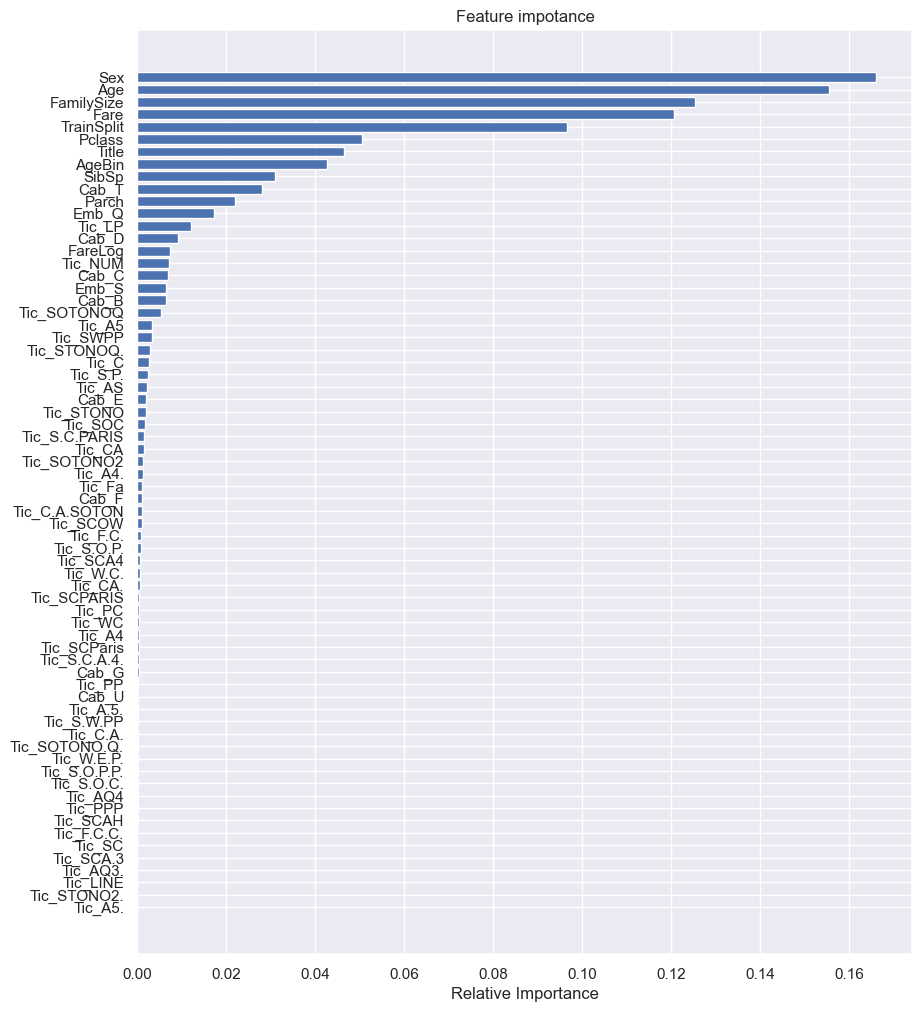

In [145]:
# 랜덤 포레스트 모델의 피처 중요도
imp_features, imp_scores = plot_importance(rf_model, selected_features)

In [146]:
# 상위 10개 피처만 선택
selected_features = imp_features[:10]
y_train = data.loc[data['TrainSplit']=='Train', 'Survived']
x_train = data.loc[data['TrainSplit']=='Train', selected_features]
x_test = data.loc[data['TrainSplit']=='Test', selected_features]
print("Train 데이터셋 크기:", x_train.shape, y_train.shape)
print("Test 데이터셋 크기 :", x_test.shape)

Train 데이터셋 크기: (891, 10) (891,)
Test 데이터셋 크기 : (418, 10)


In [147]:
# print(x_train)
x_train = x_train.drop(['TrainSplit'], axis=1)
# print(x_test)
x_test = x_test.drop(['TrainSplit'], axis=1)

In [148]:
# 10개의 피처만 가지고 랜덤포레스트 모델을 같은 조건에서 재학습한다.
# 교차검증에서 AUC스코어가 오르는 것을 확인할 수 있다.

# 랜덤포레스트
rf_model = RandomForestClassifier(random_state=2020)
auc_scores = cross_val_score(rf_model, x_train, y_train, cv=5, scoring='roc_auc')
print("개별 Fold의 AUC 점수 :", np.round(auc_scores, 4))
print("평균 AUC 점수:", np.round(np.mean(auc_scores), 4))
# rf_model.fit(x_train, y_train)
# y_test_pred = rf_model.predict(x_test)
# submission['Survived'] = y_test_pred.astype(int)
# submission.to_csv(index=False)

개별 Fold의 AUC 점수 : [0.8447 0.8123 0.8962 0.8481 0.9059]
평균 AUC 점수: 0.8614


In [149]:
# XGBoost
from xgboost import XGBClassifier
xgb_model = XGBClassifier(max_depth=3, random_state=2020)
auc_scores = cross_val_score(xgb_model, x_train, y_train, cv=5, scoring='roc_auc')
print("개별 Fold의 AUC 점수:", np.round(auc_scores, 4))
print("평균 AUC 점수:", np.round(np.mean(auc_scores), 4))
# xgb_model.fit(x_train, y_train)
# y_test_pred = xgb_model.predict(x_test)
# submission['Survived'] = y_test_pred.astype(int)
# submission.to_csv(index=False)

개별 Fold의 AUC 점수: [0.8641 0.8116 0.9103 0.8684 0.8949]
평균 AUC 점수: 0.8699
